In [1]:
import os
from keras.models import Sequential
from keras.layers import Dense, add, Activation, MaxPooling2D, Conv2D, Dropout, Flatten
from keras.utils import np_utils
import numpy as np
import matplotlib.image as mpimg
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:


path_aircraft = r"Ct_Scan_Dataset\\covidct"
path_car = r"Ct_Scan_Dataset\\normalct"
path_cat = r"Ct_Scan_Dataset\\Penomoni"
path_dog = r"Ct_Scan_Dataset\\Boronsit"
path_flower = r"Ct_Scan_Dataset\\Possible Covid"
path_fruit = r"Ct_Scan_Dataset\\possible Penomoni"


aircraft = os.listdir(path_aircraft)
car = os.listdir(path_car)
cat = os.listdir(path_cat)
dog = os.listdir(path_dog)
flower = os.listdir(path_flower)
fruit = os.listdir(path_fruit)


aircraft_img_path = aircraft
car_img_path = car
cat_img_path = cat
dog_img_path = dog
flower_img_path = flower
fruit_img_path = fruit


len_aircraft = len(aircraft)
len_car = len(car)
len_cat = len(cat)
len_dog = len(dog)
len_flower = len(flower)
len_fruit = len(fruit)


for i in range(0,len_aircraft):
    aircraft_img_path[i] = os.path.abspath(os.path.join(path_aircraft,aircraft[i]))
for i in range(0,len_car):
    car_img_path[i] = os.path.abspath(os.path.join(path_car,car[i]))
for i in range(0,len_cat):
    cat_img_path[i] = os.path.abspath(os.path.join(path_cat,cat[i]))
for i in range(0,len_dog):
    dog_img_path[i] = os.path.abspath(os.path.join(path_dog,dog[i]))
for i in range(0,len_flower):
    flower_img_path[i] = os.path.abspath(os.path.join(path_flower,flower[i]))
for i in range(0,len_fruit):
    fruit_img_path[i] = os.path.abspath(os.path.join(path_fruit,fruit[i]))



In [3]:
img_aircraft = np.zeros([727,64,64,3])
for i in range(0,len_aircraft):
    aa = mpimg.imread(aircraft_img_path[i])
    img_aircraft[i] = np.resize(aa,(64,64,3))
    
img_car = np.zeros([968,64,64,3])
for i in range(0,len_car):
    bb = mpimg.imread(car_img_path[i])
    img_car[i] = np.resize(bb,(64,64,3))

img_cat = np.zeros([885,64,64,3])
for i in range(0,len_cat):
    cc = mpimg.imread(cat_img_path[i])
    img_cat[i] = np.resize(cc,(64,64,3))
    
img_dog = np.zeros([702,64,64,3])
for i in range(0,len_dog):
    dd = mpimg.imread(dog_img_path[i])
    img_dog[i] = np.resize(dd,(64,64,3))
    
img_flower = np.zeros([843,64,64,3])
for i in range(0,len_flower):
    ee = mpimg.imread(flower_img_path[i])
    img_flower[i] = np.resize(ee,(64,64,3))
    
img_fruit = np.zeros([1000,64,64,3])
for i in range(0,len_fruit):
    ff = mpimg.imread(fruit_img_path[i])
    img_fruit[i] = np.resize(ff,(64,64,3))

In [4]:
X = np.concatenate((img_aircraft, img_car), axis=0)
X = np.concatenate((X, img_cat), axis=0)
X = np.concatenate((X, img_dog), axis=0)
X = np.concatenate((X, img_flower), axis=0)
X = np.concatenate((X, img_fruit), axis=0)


In [5]:
y1 = np.chararray((727,1), itemsize=8)
y1[:] = 'covidct'
y2 = np.chararray((968,1), itemsize=3)
y2[:] = 'normalct'
y3 = np.chararray((885,1), itemsize=3)
y3[:] = 'Penomoni'
y4 = np.chararray((702,1), itemsize=3)
y4[:] = 'Boronsit'
y5 = np.chararray((843,1), itemsize=6)
y5[:] = 'Possible Covid'
y6 = np.chararray((1000,1), itemsize=5)
y6[:] = 'possible Penomoni'

In [6]:
y = np.concatenate((y1, y2), axis=0)
y = np.concatenate((y, y3), axis=0)
y = np.concatenate((y, y4), axis=0)
y = np.concatenate((y, y5), axis=0)
y = np.concatenate((y, y6), axis=0)
#y = np.concatenate((y, y7), axis=0)
#y = np.concatenate((y, y8), axis=0)

In [7]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit_transform(y)
y_encoded = encoder.transform(y)

y_dummy = np_utils.to_categorical(y_encoded)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_dummy, test_size=0.23, random_state=42)

In [9]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(6, activation="sigmoid"))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
H1 = model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
3946/3946 [==============================] - 40s 10ms/step - loss: 0.5110 - acc: 0.8214
Epoch 2/10
3946/3946 [==============================] - 33s 8ms/step - loss: 0.4841 - acc: 0.8324
Epoch 3/10
3946/3946 [==============================] - 35s 9ms/step - loss: 0.4674 - acc: 0.8330
Epoch 4/10
3946/3946 [==============================] - 34s 9ms/step - loss: 0.4608 - acc: 0.8333
Epoch 5/10
3946/3946 [==============================] - 35s 9ms/step - loss: 0.4562 - acc: 0.8333
Epoch 6/10
3946/3946 [==============================] - 35s 9ms/step - loss: 0.4546 - acc: 0.8334
Epoch 7/10
3946/3946 [==============================] - 36s 9ms/step - loss: 0.4547 - acc: 0.8334
Epoch 8/10
3946/3946 [==============================] - 37s 9ms/step - loss: 0.4534 - acc: 0.8334
Epoch 9/10
3946/3946 [==============================] - 34s 9ms/step - loss: 0.4538 - acc: 0.8334
Epoch 10/10
3946/3946 [==============================] - 35s 9ms/step - loss: 0.4532 - acc: 0.8334


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

dict_keys(['loss', 'acc'])


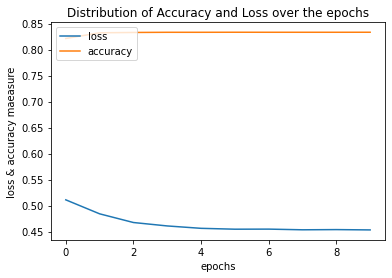

In [13]:
print(H1.history.keys())

plt.plot(H1.history["loss"])
plt.plot(H1.history["acc"])
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.xlabel("epochs")
plt.ylabel("loss & accuracy maeasure")
plt.title("Distribution of Accuracy and Loss over the epochs")
plt.show()

In [14]:
score = model.evaluate(X_test, y_test, verbose=1)
print("The score loss of test model is %f" %(score[0]))
print("The score accuracy of test model is %f" %(score[1]*100))

1179/1179 [==============================] - 3s 2ms/step
The score loss of test model is 0.449376
The score accuracy of test model is 83.333331


In [15]:
y_pred = model.predict(X_test,  batch_size=100, verbose=1)
print("The accuracy of the predicted model using the deep learning multi class classification is %f" %(100-np.mean(np.abs(y_pred - y_test)))+'%')

1179/1179 [==============================] - 2s 2ms/step
The accuracy of the predicted model using the deep learning multi class classification is 99.721446%


In [16]:
y_pred[3], y_test[3]

(array([0.13980243, 0.17555225, 0.16482499, 0.14041427, 0.19734168,
        0.19777805], dtype=float32),
 array([0., 0., 1., 0., 0., 0.], dtype=float32))

In [17]:
y_pred.shape

(1179, 6)

In [18]:
y_pred.shape

(1179, 6)

In [19]:
y_pred.shape


(1179, 6)

In [23]:
import numpy as np
#from google.colab.patches import cv2_imshow
from keras.preprocessing import image
xtest_image = image.load_img('0.jpg', target_size = (64, 64))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict_classes(xtest_image)
# training_set.class_indices

imggg = cv2.imread('0.jpg')
print("This Xray Image is of Negative covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))

plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
#if results[0][0] == 0:
#    prediction = 'Positive For Covid-19'
#else:
#    prediction = 'Negative for Covid-19'
    
    
#print("Prediction Of Our Model : ",prediction)

NameError: name 'cv2' is not defined

In [25]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = "relu",input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation = "relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation ='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(6,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = "adam",metrics = ["accuracy"])

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 54, 54, 64)        0         
__________

In [27]:
train_gen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

val_gen = image.ImageDataGenerator(
    rescale = 1./255
)

In [32]:
train_generator = train_gen.flow_from_directory(
    "DataSet\seg_train",
    target_size = (224,224),
    batch_size = 32,
    class_mode = "categorical",
)
val_generator = val_gen.flow_from_directory(
    "DataSet\seg_test",
    target_size = (224,224),
    batch_size = 32,
    class_mode = "categorical",
)

Found 291 images belonging to 6 classes.
Found 353 images belonging to 6 classes.


In [33]:
train_generator.class_indices

{'Boronsit': 0,
 'Penomoni': 1,
 'Possible Covid': 2,
 'covidct': 3,
 'normalct': 4,
 'possible Penomoni': 5}

In [34]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [35]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=9,
    epochs=10,
    validation_data = val_generator,
    validation_steps = 2,
    shuffle=True
)

Epoch 1/10
9/9 [==============================] - 185s 21s/step - loss: 0.9693 - acc: 0.7448 - val_loss: 0.5097 - val_acc: 0.8333
Epoch 2/10
9/9 [==============================] - 137s 15s/step - loss: 0.5068 - acc: 0.8269 - val_loss: 0.5085 - val_acc: 0.8333
Epoch 3/10
9/9 [==============================] - 130s 14s/step - loss: 0.4891 - acc: 0.8263 - val_loss: 0.5027 - val_acc: 0.8333
Epoch 4/10
9/9 [==============================] - 129s 14s/step - loss: 0.4817 - acc: 0.8175 - val_loss: 0.4891 - val_acc: 0.8333
Epoch 5/10
9/9 [==============================] - 131s 15s/step - loss: 0.4888 - acc: 0.8169 - val_loss: 0.5127 - val_acc: 0.8333
Epoch 6/10
9/9 [==============================] - 125s 14s/step - loss: 0.4856 - acc: 0.8234 - val_loss: 0.4930 - val_acc: 0.8333
Epoch 7/10
9/9 [==============================] - 130s 14s/step - loss: 0.4807 - acc: 0.8246 - val_loss: 0.4877 - val_acc: 0.8333
Epoch 8/10
9/9 [==============================] - 131s 15s/step - loss: 0.4667 - acc: 0.82

## Testing the trained model

In [38]:
val_path = "Ct_Scan_Dataset"
test_imgs = []

for img_ in os.listdir(val_path+"/covidct"):
    img_path = os.path.join(val_path+"/covidct",img_)
    img = image.load_img(img_path,target_size = (224,224))
    img = image.img_to_array(img)/255.0
    test_imgs.append(img)
    
for img_ in os.listdir(val_path+"/normalct"):
    img_path = os.path.join(val_path+"/normalct",img_)
    img = image.load_img(img_path,target_size = (224,224))
    img = image.img_to_array(img)/255.0
    test_imgs.append(img)

    
for img_ in os.listdir(val_path+"/normalct"):
    img_path = os.path.join(val_path+"/normalct",img_)
    img = image.load_img(img_path,target_size = (224,224))
    img = image.img_to_array(img)/255.0
    test_imgs.append(img)

for img_ in os.listdir(val_path+"/Boronsit"):
    img_path = os.path.join(val_path+"/Boronsit",img_)
    img = image.load_img(img_path,target_size = (224,224))
    img = image.img_to_array(img)/255.0
    test_imgs.append(img)
    
for img_ in os.listdir(val_path+"/Penomoni"):
    img_path = os.path.join(val_path+"/Penomoni",img_)
    img = image.load_img(img_path,target_size = (224,224))
    img = image.img_to_array(img)/255.0
    test_imgs.append(img)
for img_ in os.listdir(val_path+"/Possible Covid"):
    img_path = os.path.join(val_path+"/Possible Covid",img_)
    img = image.load_img(img_path,target_size = (224,224))
    img = image.img_to_array(img)/255.0
    test_imgs.append(img)
for img_ in os.listdir(val_path+"/possible Penomoni"):
    img_path = os.path.join(val_path+"/possible Penomoni",img_)
    img = image.load_img(img_path,target_size = (224,224))
    img = image.img_to_array(img)/255.0
    test_imgs.append(img)
test_imgs = np.array(test_imgs)
print(test_imgs.shape)

(114, 224, 224, 3)


In [41]:
# labels of all the images
# Boronsit --> 0, Penomoni --> 1, Possible Covid --> 2, covidct --> 3, normalct --> 4, possible Penomoni --> 5    
lth = int(test_imgs.shape[0]/2)
labels = np.hstack((np.zeros(lth),np.ones(lth)))
print(labels.shape)
print(labels)

(114,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [46]:
y_pred = []
for i in range(test_imgs.shape[0]):
    img = np.expand_dims(test_imgs[i],axis=0)
    pred = model.predict_classes(img)
    y_pred.append(pred[0])

y_pred = np.array(y_pred)
print(y_pred)

[5 5 5 5 5 5 5 5 5 5 5 5 2 2 2 2 5 5 5 5 2 2 2 2 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5]


In [43]:
[i.name for i in model.layers]

['conv2d_7',
 'conv2d_8',
 'max_pooling2d_6',
 'dropout_8',
 'conv2d_9',
 'max_pooling2d_7',
 'dropout_9',
 'conv2d_10',
 'max_pooling2d_8',
 'dropout_10',
 'flatten_3',
 'dense_7',
 'dropout_11',
 'dense_8']